# Astrostatistics and Data Mining - Final Report
## Ruan Hsuan Wei
## 2017/5/9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from datetime import datetime
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
data = np.genfromtxt('airbnb_session_data.txt',dtype=None,skip_header=1,delimiter="|")

# Basic statistics

In [3]:
#dealing with the data
fig_num=1
count=0
user=[[] for i in range(438)]#[ [[s,e]...[]] [....]]
user_beh=[[] for i in range(438)]#[ [[0,0,0]...[]], [...] ]
user_dur=[]#average duration per user
date=[]
dur=[[] for i in range(438)]
search=[]
message=[]
book=[]
times=[]
t=0
for i in range(len(data)-1):
    s=datetime.strptime(data[i][6], '%Y-%m-%d %H:%M:%S')
    e=datetime.strptime(data[i][7], '%Y-%m-%d %H:%M:%S')
    if ((e-s).total_seconds()/60)!=0:
        t=t+1
        date.append(s.month)
        user[count].append([s,e])
        dur[count].append((e-s).total_seconds()/60)
        user_beh[count].append([int(data[i][8]),int(data[i][9]),int(data[i][10])])
        if int(data[i][8])==1:
            search.append(s.month)
        if int(data[i][9])==1:
            message.append(s.month)
        if int(data[i][10])==1:
            book.append(s.month)
    if (i+1>len(data)-1) and t>=1:
        user_dur.append(np.mean(dur[count]))
    elif (data[i][0]!=data[i+1][0]) and (t>=1):
        user_dur.append(np.mean(dur[count]))
        times.append(len(user[count]))
        count=count+1;
        t=0


In [4]:
print "number of unique users=%d"%count
print "(users who only have one session where the session duration is less than one second does not count)"

number of unique users=438
(users who only have one session where the session duration is less than one second does not count)


figure 1


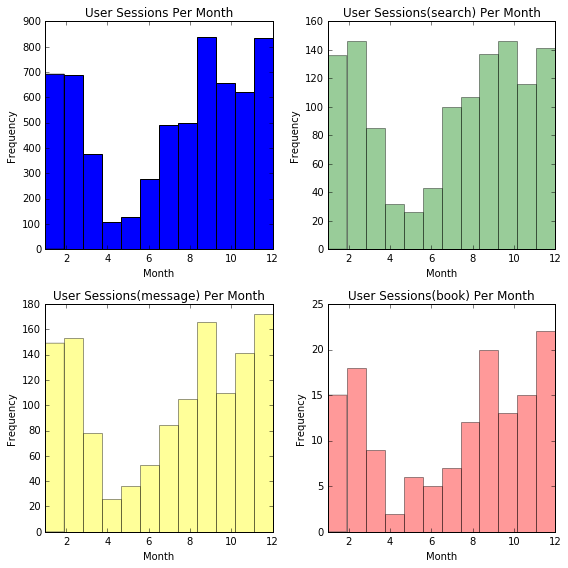

In [5]:
#user sessions per month
f,ax=plt.subplots(2,2,figsize=(8,8))
ax[0][0].hist(date,bins=12)
ax[0][0].set_title("User Sessions Per Month")

ax[0][1].hist(search,bins=12,color="green",alpha=0.4)
ax[0][1].set_title("User Sessions(search) Per Month")

ax[1][0].hist(message,bins=12,color="yellow",alpha=0.4)
ax[1][0].set_title("User Sessions(message) Per Month")

ax[1][1].hist(book,bins=12,color="red",alpha=0.4)
ax[1][1].set_title("User Sessions(book) Per Month")

for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel("Month")
        ax[i][j].set_ylabel("Frequency")
        ax[i][j].set_xlim(1,12)
plt.tight_layout()
print "figure 1"

figure 2


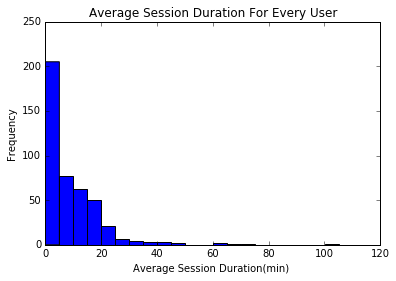

In [6]:
plt.hist(user_dur,bins='scott')
plt.title("Average Session Duration For Every User")
plt.xlabel("Average Session Duration(min) ")
plt.ylabel("Frequency")
print "figure 2"

# Regression

In [7]:
#calculating percentage of search/message/booking for every user 
num_booked=[]
num_message=[]
num_search=[]
for i in range(count):
    num_booked.append(0);
    num_message.append(0);
    num_search.append(0);
    for j in range(len(user_beh[i])):
        if user_beh[i][j][2]==1:
               num_booked[i]=num_booked[i]+1
        if user_beh[i][j][1]==1:
               num_message[i]=num_message[i]+1
        if user_beh[i][j][0]==1:
               num_search[i]=num_search[i]+1
    total_action=num_booked[i]+num_message[i]+num_search[i]

    if total_action!=0:
        num_booked[i]=(num_booked[i]*1.0)/total_action
        num_message[i]=(num_message[i]*1.0)/total_action
        num_search[i]=(num_search[i]*1.0)/total_action

figure 3


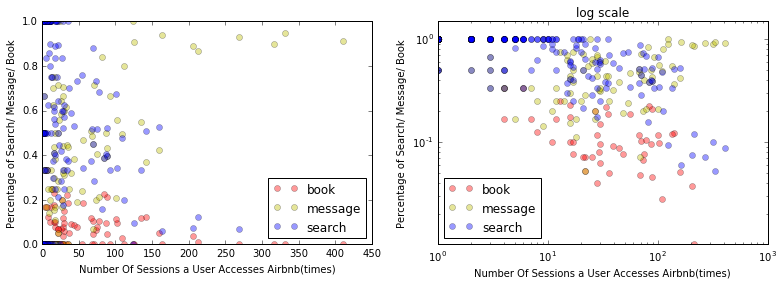

In [8]:
f,ax=plt.subplots(1,2,figsize=(13,4))
for i in range(2):
    ax[i].plot(times,num_booked,'ro',alpha=0.4,label="book")
    ax[i].plot(times,num_message,'yo',alpha=0.4,label="message")
    ax[i].plot(times,num_search,'bo',alpha=0.4,label="search")
    ax[i].set_xlabel("Number Of Sessions a User Accesses Airbnb(times)")
    ax[i].set_ylabel("Percentage of Search/ Message/ Book")
    ax[i].legend(loc=4-i)

ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylim(0,1.5)
ax[1].set_xlim(-1.0,1000)
ax[1].set_title("log scale")
print "figure 3"

We can plot the three behaviors in three separate plots to make it more clear.

figure 4


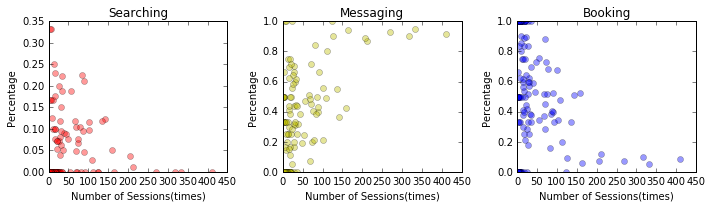

In [9]:
f,ax=plt.subplots(1,3,figsize=(10,3))
beh=['Searching','Messaging','Booking']
ax[0].plot(times,num_booked,'ro',alpha=0.4,label="book")
ax[1].plot(times,num_message,'yo',alpha=0.4,label="message")
ax[2].plot(times,num_search,'bo',alpha=0.4,label="search")
for i in range(3):
    ax[i].set_xlabel("Number of Sessions(times)")
    ax[i].set_ylabel("Percentage")
    ax[i].set_title('%s'%beh[i])
plt.tight_layout()
print "figure 4"

A point in the plots indicates the percentage of the actions(booked, messaged, or searched) within all the sessions of a particular user.

In [10]:
#grouping data
bin_range=10
pivot=0
index=0
group_x=[]
group_y_search=[]
group_y_message=[]
group_y_book=[]

std_search=[]
std_message=[]
std_book=[]

while pivot<500:
    flag=0
    for i in range(count):
        if times[i]>=pivot and times[i]<=pivot+bin_range:
            if flag==0:
                group_y_search.append([])
                group_y_message.append([])
                group_y_book.append([])
                
                group_x.append([])
                flag=1
            group_y_search[index].append(num_search[i])
            group_y_message[index].append(num_message[i])
            group_y_book[index].append(num_booked[i])

    if flag==1:
        group_x[index]=(pivot+pivot+bin_range)/2
        std_search.append(np.std(group_y_search[index]))
        std_message.append(np.std(group_y_message[index]))
        std_book.append(np.std(group_y_book[index]))
        group_y_search[index]=np.mean(group_y_search[index])
        group_y_message[index]=np.mean(group_y_message[index])
        group_y_book[index]=np.mean(group_y_book[index])

        index=index+1
    pivot=pivot+bin_range

In [11]:
#dealing with the zero errors(explained in report)
for i in range(len(group_x)):
    if std_search[i]==0:
        std_search[i]=0.03
    if std_message[i]==0:
        std_message[i]=0.03
    if std_book[i]==0:
        std_book[i]=0.03

figure 5


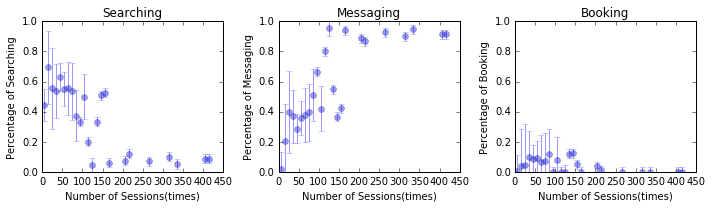

In [12]:
f,ax=plt.subplots(1,3,figsize=(10,3))
ax[0].errorbar(group_x,group_y_search,yerr=std_message,alpha=0.4,fmt='o')
ax[1].errorbar(group_x,group_y_message,yerr=std_message,alpha=0.4,fmt='o')
ax[2].errorbar(group_x,group_y_book,yerr=std_message,alpha=0.4,fmt='o')

for i in range(3):
    ax[i].set_xlabel("Number of Sessions(times)")
    ax[i].set_ylabel("Percentage of %s" %beh[i])
    ax[i].set_title("%s"%beh[i])
    ax[i].set_ylim(0,1)
plt.tight_layout()
print "figure 5"

### Classical Inference

figure 6


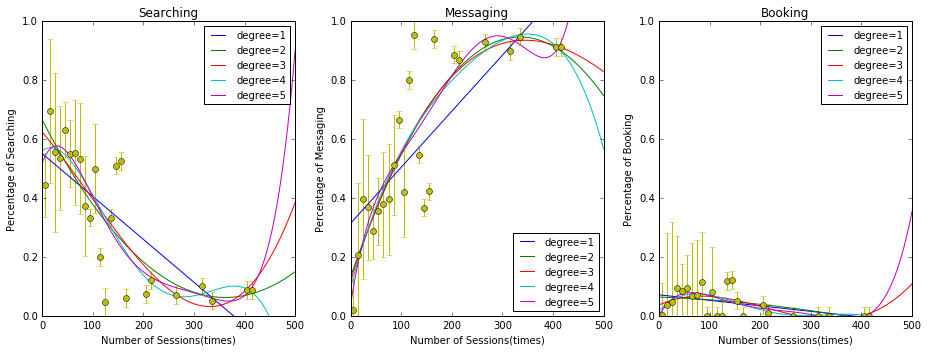

In [13]:
#fitting line(least square)
f,ax=plt.subplots(1,3,figsize=(13,5))

x_fit=np.linspace(1,500,100)
degree=[1,2,3,4,5]
group=[group_y_search,group_y_message,group_y_book]
for i,g in enumerate(group):
    for deg in degree:
        p = np.polyfit(group_x,g,deg)
        y_fit = np.polyval(p, x_fit)
        ax[i].plot(x_fit,y_fit,label="degree=%d"%deg)
    ax[i].errorbar(group_x,g,yerr=std_message,fmt='o')
    ax[i].set_xlabel("Number of Sessions(times)")
    ax[i].set_ylabel("Percentage of %s" %beh[i])
    ax[i].set_title("%s"%beh[i])
    ax[i].set_ylim(0,1)
ax[0].legend(loc=1,fontsize=10)
ax[1].legend(loc=4,fontsize=10)
ax[2].legend(loc=1,fontsize=10)

plt.tight_layout()
print "figure 6"

figure 7


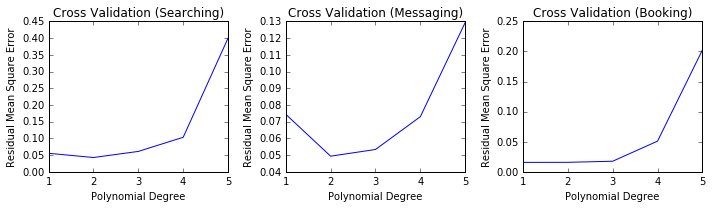

In [14]:
#cross validation
f,ax=plt.subplots(1,3,figsize=(10,3))
for j,g in enumerate(group):
    CV_err=[]
    for deg in degree:
        err=0
        for i in range(3):
            X_train, X_test, y_train, y_test = train_test_split(group_x,g, test_size=0.4, random_state=0)
            p = np.polyfit(X_train,y_train,deg)
            err=err+np.sqrt(np.sum((np.polyval(p, X_test)-y_test)**2))/len(X_test)
        CV_err.append(err/3)
    ax[j].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[j].plot(degree,CV_err)
    ax[j].set_title("Cross Validation (%s)"%beh[j])
    ax[j].set_xlabel("Polynomial Degree")
    ax[j].set_ylabel("Residual Mean Square Error")
plt.tight_layout()
print "figure 7"

figure 8


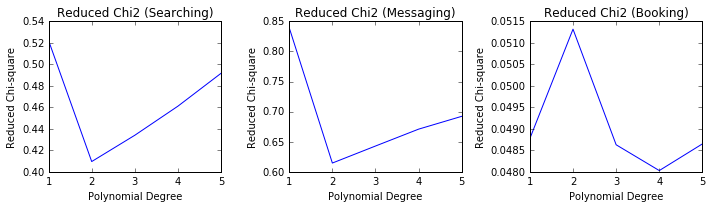

In [15]:
#reduced chi-square
f,ax=plt.subplots(1,3,figsize=(10,3))

std=[std_search,std_message,std_book]
for j,g in enumerate(group):
    chi_score=[]
    for deg in degree:
        p = np.polyfit(group_x,g,deg)
        y_fit = np.polyval(p, group_x)
        chi2=np.sum((((g - y_fit))**2)/std[j])
        dof=len(group_x)-deg-1
        chi_score.append(chi2/dof)
    ax[j].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[j].plot(degree,chi_score)
    ax[j].set_title("Reduced Chi2 (%s)"%beh[j])
    ax[j].set_ylabel("Reduced Chi-square")
    ax[j].set_xlabel("Polynomial Degree")
plt.tight_layout()
print "figure 8"

Searching:  [-0.00145776  0.55101718]
Messaging:  [ -7.27568584e-06   4.86650436e-03   1.33465606e-01]
Booking:  [ -3.08335475e-07  -6.14349076e-05   6.35390174e-02]
figure 16


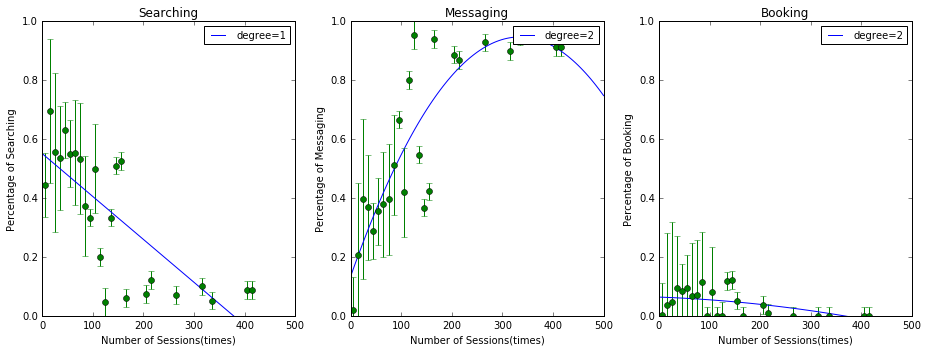

In [16]:
f,ax=plt.subplots(1,3,figsize=(13,5))

deg=[1,2,2]
for i,g in enumerate(group):
    p = np.polyfit(group_x,g,deg[i])
    y_fit = np.polyval(p, x_fit)
    print "%s: "%beh[i],p
    ax[i].plot(x_fit,y_fit,label="degree=%d"%deg[i])
    ax[i].errorbar(group_x,g,yerr=std_message,fmt='o')
    ax[i].set_xlabel("Number of Sessions(times)")
    ax[i].set_ylabel("Percentage of %s" %beh[i])
    ax[i].set_title("%s"%beh[i])
    ax[i].set_ylim(0,1)
    ax[i].legend(fontsize=10)
plt.tight_layout()
print "figure 16"

### Bayesian Inference (frequentist and bayesian inference comparison on "percentage of messaging" only)

figure 9


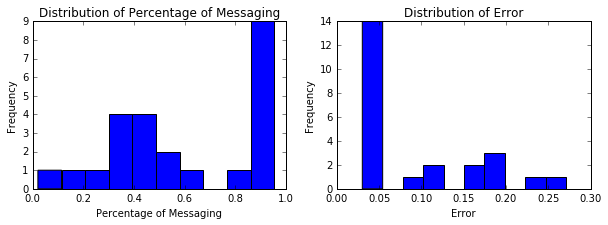

In [17]:
#Plotting distribution of percentage of messaging and the distribution of error(standard deviation)of the group
f,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].hist(group_y_message)
ax[1].hist(std_message)
ax[0].set_xlabel('Percentage of Messaging')
ax[1].set_xlabel("Error")
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

ax[0].set_title('Distribution of Percentage of Messaging')
ax[1].set_title("Distribution of Error")
print "figure 9"

figure 10


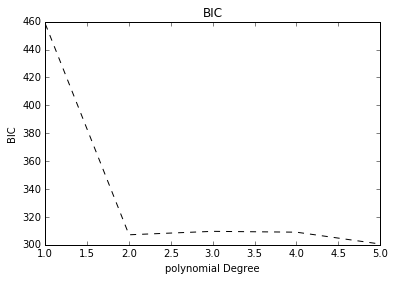

In [18]:
#BIC
def log_like(deg,x,y,std):
    p = np.polyfit(x, y, deg)
    y_fit = np.polyval(p, x)
    sigma_y=np.array(std)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2) + (y - y_fit) ** 2 / sigma_y ** 2)

plot_bic=[]
for deg in degree: 
    bic=np.log(len(group_x))*deg - 2*(log_like(deg,group_x,group_y_message,std_message))
    plot_bic.append(bic)
    
plt.plot(degree,plot_bic,'--k')
plt.title("BIC")
plt.xlabel("polynomial Degree")
plt.ylabel("BIC")
print "figure 10"

In [19]:
data=[group_x,group_y_message]
data=np.array(data)

In [20]:
#MCMC
def polynomial_fit(theta, x):
    return sum(t * x ** n for (n, t) in enumerate(theta))

def log_prior(theta):
    return 1;

def log_likelihood(theta, data=data):
    x, y= data
    sigma_y=np.array(std_message)
    y_fit = polynomial_fit(theta, x)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2)
                         + ((y - y_fit) ** 2 )*1.0/ sigma_y ** 2)

def log_posterior(theta, data=data):
    theta = np.asarray(theta)
    return log_prior(theta) + log_likelihood(theta,data)

In [21]:
def compute_mcmc(degree, data=data,
                   log_posterior=log_posterior,
                   nwalkers=20, nburn=1000, nsteps=2000):
    ndim = degree + 1  
    rng = np.random.RandomState(0)
    starting_guesses = rng.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
    sampler.run_mcmc(starting_guesses, nsteps)
    trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)

    return trace

In [22]:
from scipy import integrate

def integrate_posterior_2D(log_posterior, xlim, ylim, data=data):
    func = lambda theta1, theta0: np.exp(log_posterior([theta0, theta1], data))
    return integrate.dblquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1])

def integrate_posterior_3D(log_posterior, xlim, ylim, zlim, data=data):
    func = lambda theta2, theta1, theta0: np.exp(log_posterior([theta0, theta1, theta2], data))
    return integrate.tplquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1],
                             lambda x, y: zlim[0], lambda x, y: zlim[1])

def integrate_posterior_4D(log_posterior, xlim, ylim, zlim,klim, data=data):
    func = lambda theta3,theta2, theta1, theta0: np.exp(log_posterior([theta0, theta1, theta2,theta3], data))
    return integrate.nquad(func, [[xlim[0], xlim[1]],[ylim[0], ylim[1]],[zlim[0], zlim[1]],[klim[0], klim[1]]])


In [23]:
import emcee

degree=[1,2,3,4,5]
sample=[]

for deg in degree:
    sample.append(compute_mcmc(deg))

In [24]:
xlim, ylim = zip(sample[0].min(0), sample[0].max(0))
Z1, err_Z1 = integrate_posterior_2D(log_posterior, xlim, ylim)

xlim, ylim, zlim = zip(sample[1].min(0), sample[1].max(0))
Z2, err_Z2 = integrate_posterior_3D(log_posterior, xlim, ylim, zlim)

xlim, ylim, zlim, klim= zip(sample[2].min(0), sample[2].max(0))
Z3, err_Z3 = integrate_posterior_4D(log_posterior, xlim, ylim, zlim,klim)


In [25]:
print("Z1 =", Z1, "+/-", err_Z1)  
print("Z2 =", Z2, "+/-", err_Z2)  
print("Z3 =", Z3, "+/-", err_Z3)


('Z1 =', 1.371208231232229e-81, '+/-', 1.152663149350576e-80)
('Z2 =', 8.420935562796065e-76, '+/-', 4.822273013362701e-71)
('Z3 =', 0.0, '+/-', 0)


In [26]:
print("odds ratio z2/z1=%lf" %(Z2*1.0/Z1)) 
# print("odds ratio z3/z2=%lf" %(Z3*1.0/Z2)) 

odds ratio z2/z1=614125.219714


figure 11


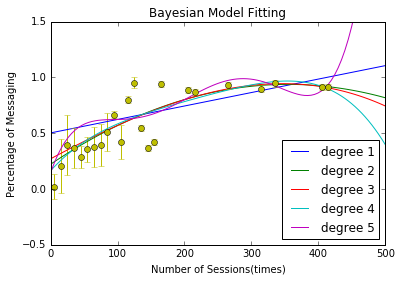

In [27]:
plt.plot(x_fit,x_fit*sample[0].T[1].mean()+sample[0].T[0].mean(),label='degree 1')
plt.plot(x_fit,(x_fit**2)*sample[1].T[2].mean()+x_fit*sample[1].T[1].mean()+sample[1].T[0].mean(),label='degree 2')
plt.plot(x_fit,(x_fit**3)*sample[2].T[3].mean()+(x_fit**2)*sample[2].T[2].mean()+x_fit*sample[2].T[1].mean()+sample[2].T[0].mean(),label='degree 3')
plt.plot(x_fit,(x_fit**4)*sample[3].T[4].mean()+(x_fit**3)*sample[3].T[3].mean()+(x_fit**2)*sample[3].T[2].mean()+x_fit*sample[3].T[1].mean()+sample[3].T[0].mean(),label='degree 4')
plt.plot(x_fit,(x_fit**5)*sample[4].T[5].mean()+(x_fit**4)*sample[4].T[4].mean()+(x_fit**3)*sample[4].T[3].mean()+(x_fit**2)*sample[4].T[2].mean()+x_fit*sample[4].T[1].mean()+sample[4].T[0].mean(),label='degree 5')

plt.errorbar(group_x,group_y_message,yerr=std_message,fmt='o')
plt.xlabel("Number of Sessions(times)")
plt.ylabel("Percentage of Messaging")
plt.title("Bayesian Model Fitting")
plt.legend(loc=4)
plt.ylim(-0.5,1.5)
print "figure 11"

figure 17


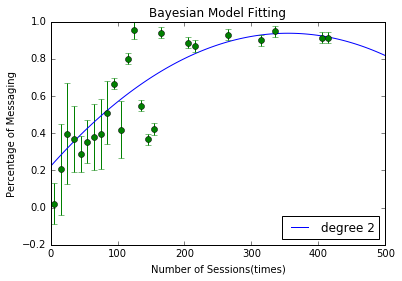

In [28]:
#Plot final result
plt.plot(x_fit,(x_fit**2)*sample[1].T[2].mean()+x_fit*sample[1].T[1].mean()+sample[1].T[0].mean(),label='degree 2')

plt.errorbar(group_x,group_y_message,yerr=std_message,fmt='o')
plt.xlabel("Number of Sessions(times)")
plt.ylabel("Percentage of Messaging")
plt.title("Bayesian Model Fitting")
plt.legend(loc=4)
print "figure 17"

# Clustering:

In [29]:
data = np.genfromtxt('airbnb_session_data.txt',dtype=None,skip_header=1,delimiter="|")

### Kmeans:

In [30]:
per=[num_search,num_message,num_booked]
per=np.array(per).T

figure 12


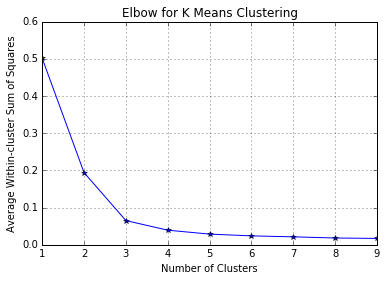

In [31]:
#Elbow curve(decide best k for k means)
from scipy.spatial.distance import cdist, pdist

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(per) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(per, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/len(per) for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(per)**2)/len(per)
bss = tss-wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-cluster Sum of Squares')
plt.title('Elbow for K Means Clustering')
print "figure 12"

In [32]:
from matplotlib.colors import ListedColormap
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(per)

figure 18


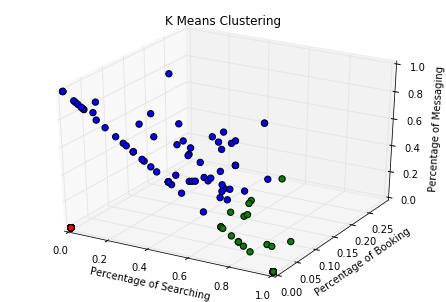

In [33]:
fig=plt.figure()
ax=Axes3D(fig)
color=['r','g','b']
cmap_light = ListedColormap(color)#group0=red,group1=green,group2=blue

ax.scatter(per[:,0], per[:,2], per[:,1],c=kmeans, cmap=cmap_light,s=40,alpha=1)  
ax.set_xlim(0,1)
ax.set_ylim(0,0.3)
ax.set_zlim(0,1)

ax.set_xlabel("Percentage of Searching")
ax.set_ylabel("Percentage of Booking")
ax.set_zlabel("Percentage of Messaging")
ax.set_title("K Means Clustering")
print "figure 18"

In [34]:
#Analyze the device used in each group by session
count=0
dev_list=[[]for i in range(3)]
for i in range(len(data)-1):
    s=datetime.strptime(data[i][6], '%Y-%m-%d %H:%M:%S')
    e=datetime.strptime(data[i][7], '%Y-%m-%d %H:%M:%S')
    if ((e-s).total_seconds()/60)!=0:
        t=t+1
        dev_list[kmeans[count]].append(data[i][4])
    if ((i+1>len(data)-1) or (data[i][0]!=data[i+1][0]))and t>=1:
        t=0 
        count=count+1

figure 19


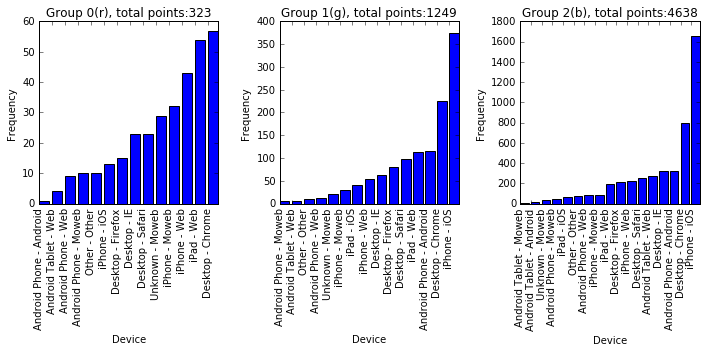

In [35]:
from collections import Counter
f,ax=plt.subplots(1,3,figsize=(10,5))
for i in range(3):
    dev_count = Counter(dev_list[i])
    freq=dev_count.values()
    name=dev_count.keys()
    yx=zip(freq,name)
    yx.sort()
    freq=[x for x,y in yx]
    name=[y for x,y in yx]
    xbin=np.arange(len(name))

    ax[i].xaxis.set_major_locator(plt.FixedLocator(xbin))
    ax[i].xaxis.set_major_formatter(plt.FixedFormatter(name))
    ax[i].bar(xbin,freq)
    ax[i].set_xticklabels(name,rotation='vertical')
    ax[i].set_title("Group %d(%s), total points:%d"%(i,color[i],sum(freq)))
    ax[i].set_xlabel("Device")
    ax[i].set_ylabel("Frequency")
plt.tight_layout()
print "figure 19"

### Mean shift:

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [37]:
#mean shift
bandwidth = estimate_bandwidth(per, quantile=0.4, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(per)

In [38]:
bandwidth

0.25629441654921581

figure 20


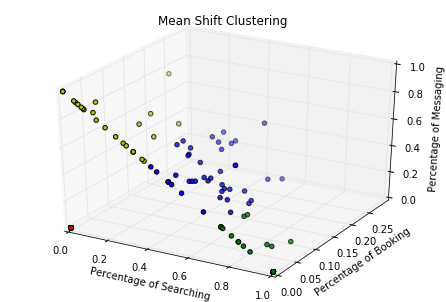

In [39]:
fig=plt.figure()

ax=Axes3D(fig)
color=['r', 'g', 'b','y']
cmap_light = ListedColormap(color)

ax.scatter(per[:,0], per[:,2],per[:,1], c=ms, cmap=cmap_light)  
ax.set_xlabel("Percentage of Searching")
ax.set_ylabel("Percentage of Booking")
ax.set_zlabel("Percentage of Messaging")
ax.set_title("Mean Shift Clustering")
ax.set_xlim(0,1)
ax.set_ylim(0,0.3)
ax.set_zlim(0,1)
print "figure 20"

In [40]:
#Analyze the devices used in each group by session
count=0
dev_list=[[]for i in range(4)]
for i in range(len(data)-1):
    s=datetime.strptime(data[i][6], '%Y-%m-%d %H:%M:%S')
    e=datetime.strptime(data[i][7], '%Y-%m-%d %H:%M:%S')
    if ((e-s).total_seconds()/60)!=0:
        t=t+1
        dev_list[ms[count]].append(data[i][4])
    if ((i+1>len(data)-1) or (data[i][0]!=data[i+1][0]))and t>=1:
        t=0 
        count=count+1

figure 21


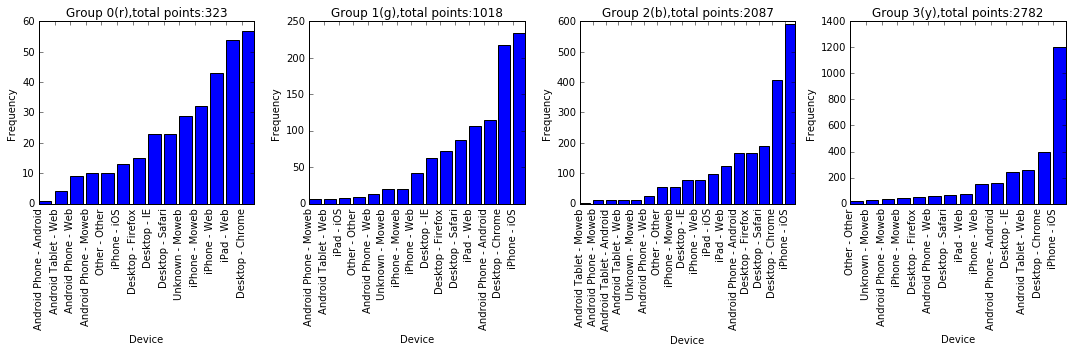

In [41]:
from collections import Counter
f,ax=plt.subplots(1,4,figsize=(15,5))
for i in range(4):
    dev_count = Counter(dev_list[i])
    freq=dev_count.values()
    name=dev_count.keys()
    yx=zip(freq,name)
    yx.sort()
    freq=[x for x,y in yx]
    name=[y for x,y in yx]
    xbin=np.arange(len(name))

    ax[i].xaxis.set_major_locator(plt.FixedLocator(xbin))
    ax[i].xaxis.set_major_formatter(plt.FixedFormatter(name))
    ax[i].bar(xbin,freq)
    ax[i].set_xticklabels(name,rotation='vertical')
    ax[i].set_title("Group %d(%s),total points:%d"%(i,color[i],sum(freq)))
    ax[i].set_xlabel("Device")
    ax[i].set_ylabel("Frequency")
plt.tight_layout()
print "figure 21"

### Agglomerative hierarchical clustering

In [42]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

figure 13


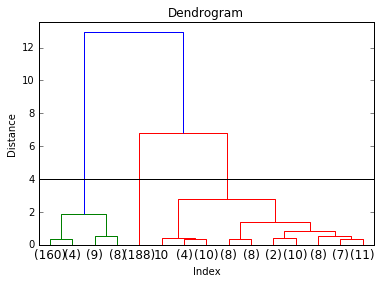

In [43]:
Z = hierarchy.linkage(per, 'ward')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=15  )
plt.ylabel("Distance")
plt.xlabel("Index")
plt.axhline(y=4, c='k')
plt.title("Dendrogram")
print "figure 13"

figure 22


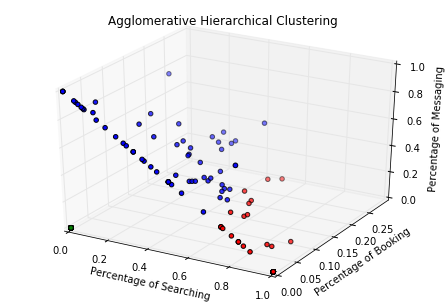

In [44]:
k=3
clusters=fcluster(Z, k, criterion='maxclust')
color=['r','g','b']
cmap_light = ListedColormap(color)#group0=red,group1=green,group2=blue

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(per[:,0], per[:,2],per[:,1], c=clusters, cmap=cmap_light)  # plot points with cluster dependent colors
ax.set_xlabel("Percentage of Searching")
ax.set_ylabel("Percentage of Booking")
ax.set_zlabel("Percentage of Messaging")
ax.set_title("Agglomerative Hierarchical Clustering")
ax.set_xlim(0,1)
ax.set_ylim(0,0.3)
ax.set_zlim(0,1)
print "figure 22"

In [45]:
#Analyze the devices used in each group by session
count=0
dev_list=[[]for i in range(3)]
for i in range(len(data)-1):
    s=datetime.strptime(data[i][6], '%Y-%m-%d %H:%M:%S')
    e=datetime.strptime(data[i][7], '%Y-%m-%d %H:%M:%S')
    if ((e-s).total_seconds()/60)!=0:
        t=t+1
        dev_list[clusters[count]-1].append(data[i][4])
    if ((i+1>len(data)-1) or (data[i][0]!=data[i+1][0]))and t>=1:
        t=0 
        count=count+1

figure 23


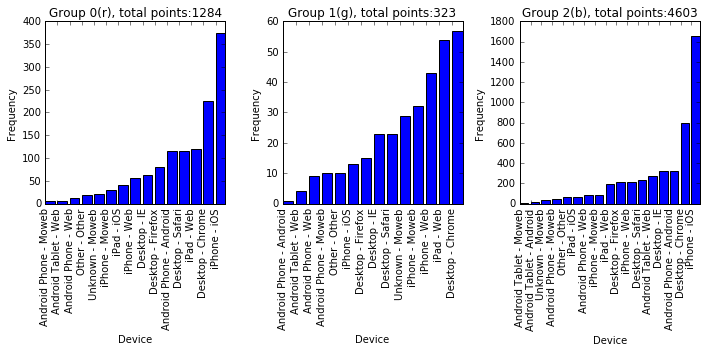

In [46]:
from collections import Counter
f,ax=plt.subplots(1,3,figsize=(10,5))
for i in range(3):
    dev_count = Counter(dev_list[i])
    freq=dev_count.values()
    name=dev_count.keys()
    yx=zip(freq,name)
    yx.sort()
    freq=[x for x,y in yx]
    name=[y for x,y in yx]
    xbin=np.arange(len(name))

    ax[i].xaxis.set_major_locator(plt.FixedLocator(xbin))
    ax[i].xaxis.set_major_formatter(plt.FixedFormatter(name))
    ax[i].bar(xbin,freq)
    ax[i].set_xticklabels(name,rotation='vertical')
    ax[i].set_title("Group %d(%s), total points:%d"%(i,color[i],sum(freq)))
    ax[i].set_xlabel("Device")
    ax[i].set_ylabel("Frequency")
plt.tight_layout()
print "figure 23"

# Classification

In [47]:
from sklearn import neighbors, datasets

In [48]:
data = np.genfromtxt('airbnb_session_data.txt',dtype=None,skip_header=1,delimiter="|")

In [49]:
#generate "premium users","moderate users","less-contribution users"
user_rank=[]
temp=0
_max=[]
for i in range(len(data)-1):
    s=datetime.strptime(data[i][6], '%Y-%m-%d %H:%M:%S')
    e=datetime.strptime(data[i][7], '%Y-%m-%d %H:%M:%S')
    if ((e-s).total_seconds()/60)!=0:
        t=t+1
        if data[i][10]==1:
            temp=temp+1
    if ((i+1>len(data)-1) or (data[i][0]!=data[i+1][0]))and t>=1:
        if temp>3:
            user_rank.append(0)
        elif temp>=1 and temp<=3:
            user_rank.append(1)
        else:
            user_rank.append(2)
        _max.append(temp)
        temp=0
        t=0

In [50]:
print np.mean(_max)
print np.std(_max)

0.328767123288
1.33503675513


figure 14


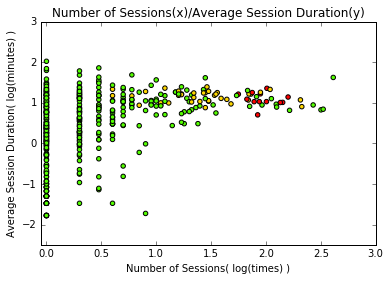

In [51]:
plt.scatter(np.log10(times),np.log10(user_dur),c=user_rank,cmap='prism')
plt.xlabel("Number of Sessions( log(times) )")
plt.ylabel("Average Session Duration( log(minutes) )")
plt.title("Number of Sessions(x)/Average Session Duration(y)")
plt.ylim(-2.5,3)
plt.xlim(-0.05,3)
print "figure 14"

### k nearest neighbors:

In [52]:
X=[times,user_dur]
X=np.log10(X)
X=np.array(X).T

In [53]:
from sklearn.neighbors import KNeighborsClassifier

Cross validation error is minimized when k=33 
figure 15


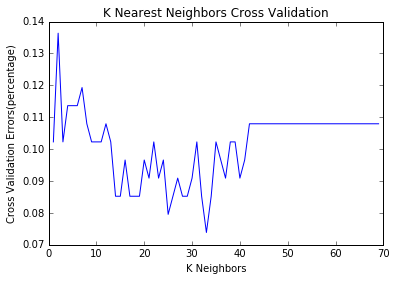

In [54]:
#find best k for k nearest neighbor by cross validation
y=user_rank
Xy_train, Xy_test, train_class, test_class = train_test_split(X,y, test_size=0.4, random_state=0)

neighbors=list(range(1,70))
classify=[]
cross_err=[]
for k in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xy_train, train_class) 
    classify=neigh.predict(Xy_test)
    temp=0
    for i in range(len(classify)):
        if classify[i]!=test_class[i]:
            temp=temp+1
    cross_err.append(temp*1.0/len(classify))
plt.plot(neighbors,cross_err)
plt.xlabel("K Neighbors")
plt.ylabel("Cross Validation Errors(percentage)")
plt.title("K Nearest Neighbors Cross Validation")
print "Cross validation error is minimized when k=%d "%(cross_err.index(np.min(cross_err))+1)
print "figure 15"

figure 24


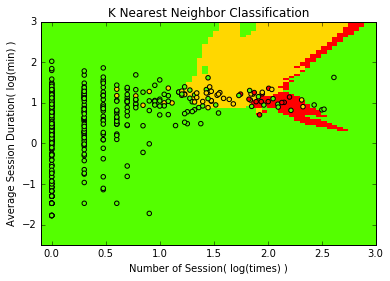

In [55]:
#k nearest neighbors
n_neighbors=33
h=0.05
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='prism')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='prism')

plt.xlabel("Number of Session( log(times) )")
plt.ylabel("Average Session Duration( log(min) )")
plt.title("K Nearest Neighbor Classification")
plt.ylim(-2.5,3)
plt.xlim(-0.1,3)
print "figure 24"

### Support Vector Classification:

figure 25


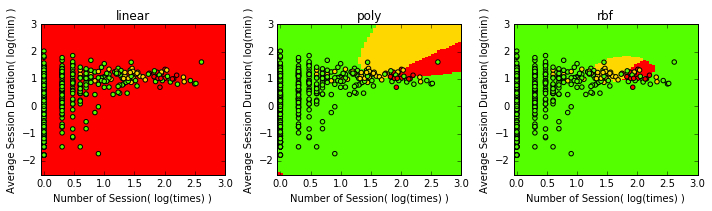

In [56]:
from sklearn.svm import SVC

h=0.05
f,ax=plt.subplots(1,3,figsize=(10,3))
for i,kernel in enumerate(['linear', 'poly', 'rbf']):
    clf = SVC(kernel=kernel, gamma=2)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].pcolormesh(xx, yy, Z, cmap='prism')
    
    ax[i].scatter(X[:, 0], X[:, 1], c=y, cmap='prism')
    ax[i].set_xlabel("Number of Session( log(times) )")
    ax[i].set_ylabel("Average Session Duration( log(min) )")
    ax[i].set_ylim(-2.5,3)
    ax[i].set_xlim(-0.05,3)
    ax[i].set_title("%s"%kernel)
plt.tight_layout()
print "figure 25"

In [57]:
#cross validation on different kernels
Xy_train, Xy_test, train_class, test_class = train_test_split(X,y, test_size=0.4, random_state=0)

classify=[]
cross_err=[]
ker=['linear', 'poly', 'rbf']
for i,kernel in enumerate(ker):
    clf = SVC(kernel=kernel, gamma=2)
    clf.fit(X, y)
    classify=clf.predict(Xy_test)
    temp=0
    for i in range(len(classify)):
        if classify[i]!=test_class[i]:
            temp=temp+1
    cross_err.append((temp*1.0)/len(classify))
print cross_err
print "Cross validation percentage of error of linear kernel is %f"%(cross_err[0])
print "Cross validation percentage of error of polynomial kernel is %f"%(cross_err[1])
print "Cross validation percentage of error of RBF kernel is %f"%(cross_err[2])


[0.10795454545454546, 0.09090909090909091, 0.07386363636363637]
Cross validation percentage of error of linear kernel is 0.107955
Cross validation percentage of error of polynomial kernel is 0.090909
Cross validation percentage of error of RBF kernel is 0.073864
